In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib import colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
import numpy as np
np.set_printoptions(threshold='nan')
import pandas as pd
import seaborn as sns
import sys
if sys.version_info[0] < 3:
    import Tkinter as Tk
else:
    import tkinter as Tk
    
#from tkFileDialog import askopenfilename,askdirectory,asksaveasfile
sys.path.append('python')
import clusterOutliers
import keplerml
%matplotlib notebook

def tabby(df):
    return df[df.index.str.contains('8462852')]

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
# the FullSample is all common points between Quarters 4, 8, 11, and 16. These files are set up as pandas dataframes
# and contain calculated features and previously computed cluster identifications.

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q4.dataSample = Q4.data
Q4.filesSample =Q4.dataSample.index
Q4.sampleGenerated = True
Q4.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q8_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q8fitsfiles" # path to fits files
Q8 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
# This is only a sampling of the data, so the dataSample is, by definition, the data
Q8.dataSample=Q8.data
Q8.filesSample=Q8.dataSample.index
# Specify that the sample is a good one
Q8.sampleGenerated = True
# Specifying that the sample has a TSNE reduction
Q8.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q11_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q11fitsfiles" # path to fits files
Q11 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q11.dataSample = Q11.data
Q11.filesSample =Q11.dataSample.index
Q11.sampleGenerated = True
Q11.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q16_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q16fitsfiles" # path to fits files
Q16 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q16.dataSample = Q16.data
Q16.filesSample =Q16.dataSample.index
Q16.sampleGenerated = True
Q16.sampleTSNE = True

#Q_dict = {'Q4':Q4,'Q8':Q8,'Q11':Q11,'Q16':Q16}

In [3]:
featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_4" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_8" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q8_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_11" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q11_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_16" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q16_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

Q_dict = {'Q4':Q4_sample,'Q8':Q8_sample,'Q11':Q11_sample,'Q16':Q16_sample}

In [4]:
%matplotlib inline

def four_panel_tsne(data):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(422)

    ax1.scatter(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                c=colorVal[labels==-1][outliers.tsne_x<40],
                marker='.',alpha=.2)
    ax1.set_title('Outliers')

    ax2 = fig.add_subplot(421)
    ax2.scatter(core.tsne_x,
                core.tsne_y,
                c=colorVal[labels==0],
                marker='.',alpha=.2)
    ax2.set_title('Cluster Core Members')

    ax3 = fig.add_subplot(423)
    ax3.scatter(edge.tsne_x,
                edge.tsne_y,
                c=colorVal[labels==1],
                marker='.',alpha=.2)
    ax3.set_title('Cluster Edge Members')
    
    ax4 = fig.add_subplot(424)
    ax4.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [5]:
%matplotlib inline

from matplotlib import colors
import matplotlib.cm as cmx

def four_panel_pca(data):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(422)

    ax1.scatter(outliers.pca_x,
                outliers.pca_y,
                c=colorVal[labels==-1],
                marker='.',alpha=.2)
    ax1.set_title('Outliers')

    ax2 = fig.add_subplot(421)
    ax2.scatter(core.pca_x,
                core.pca_y,
                c=colorVal[labels==0],
                marker='.',alpha=.2)
    ax2.set_title('Cluster Core Members')

    ax3 = fig.add_subplot(423)
    ax3.scatter(edge.pca_x,
                edge.pca_y,
                c=colorVal[labels==1],
                marker='.',alpha=.2)
    ax3.set_title('Cluster Edge Members')
    
    ax4 = fig.add_subplot(424)
    ax4.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [20]:
def tsne_scatter(data,hl_tabby=True):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)
    ax = plt.subplot()

    ax.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    tabbystar = tabby(data)
    ax.scatter(tabbystar.tsne_x,tabbystar.tsne_y,c='red',marker='o')
    ax.set_title('All data')
    
    return ax

In [13]:
tabby(Q4_sample.data).tsne_x

kplr008462852-2010078095331_llc.fits    0.826585
Name: tsne_x, dtype: float64

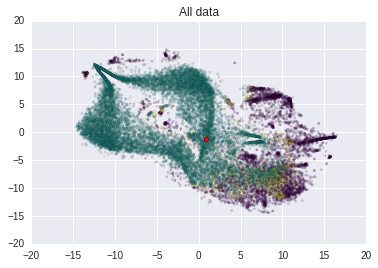

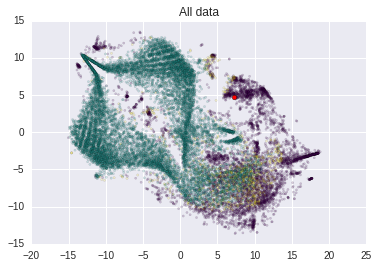

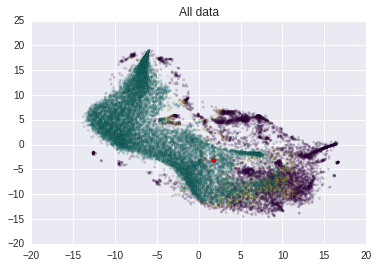

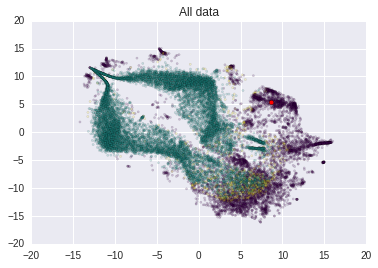

In [21]:
%matplotlib inline
fig = plt.figure()
ax1 = tsne_scatter(Q4_sample.data)
fig = plt.figure()
ax2 = tsne_scatter(Q8_sample.data)
fig = plt.figure()
ax3 = tsne_scatter(Q11_sample.data)
fig = plt.figure()
ax4 = tsne_scatter(Q16_sample.data)


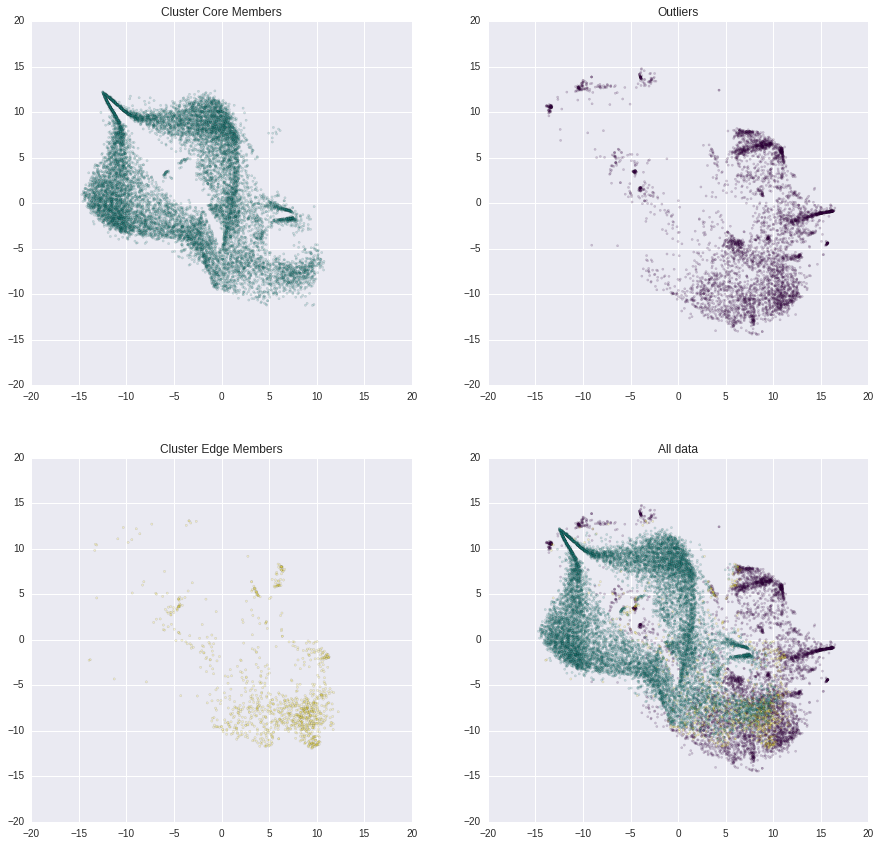

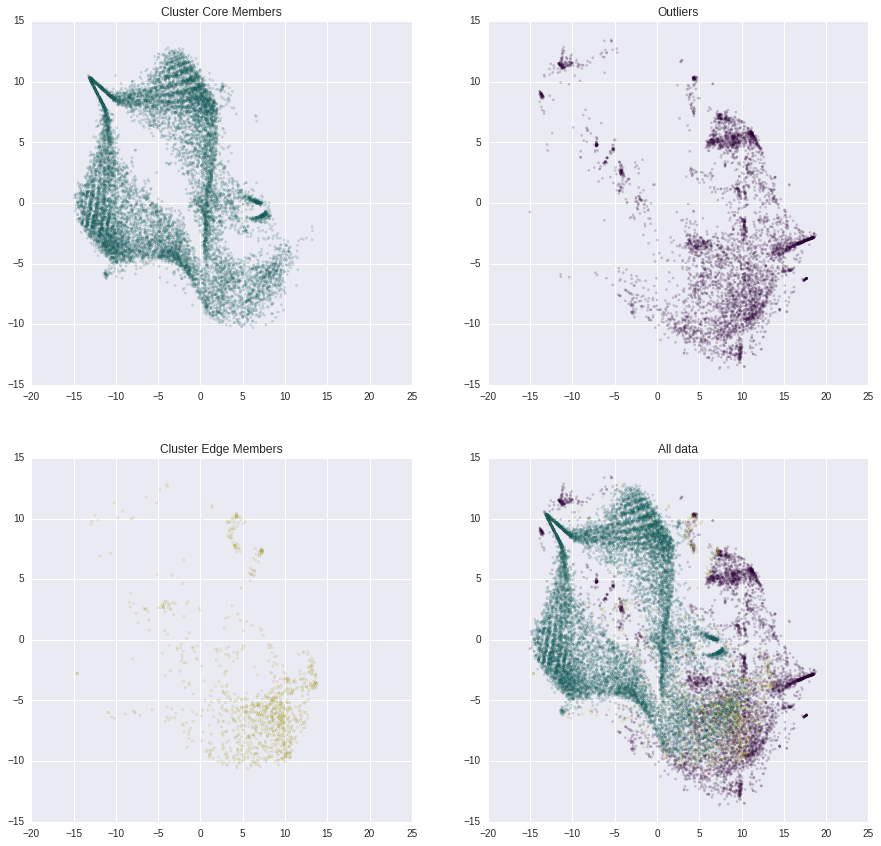

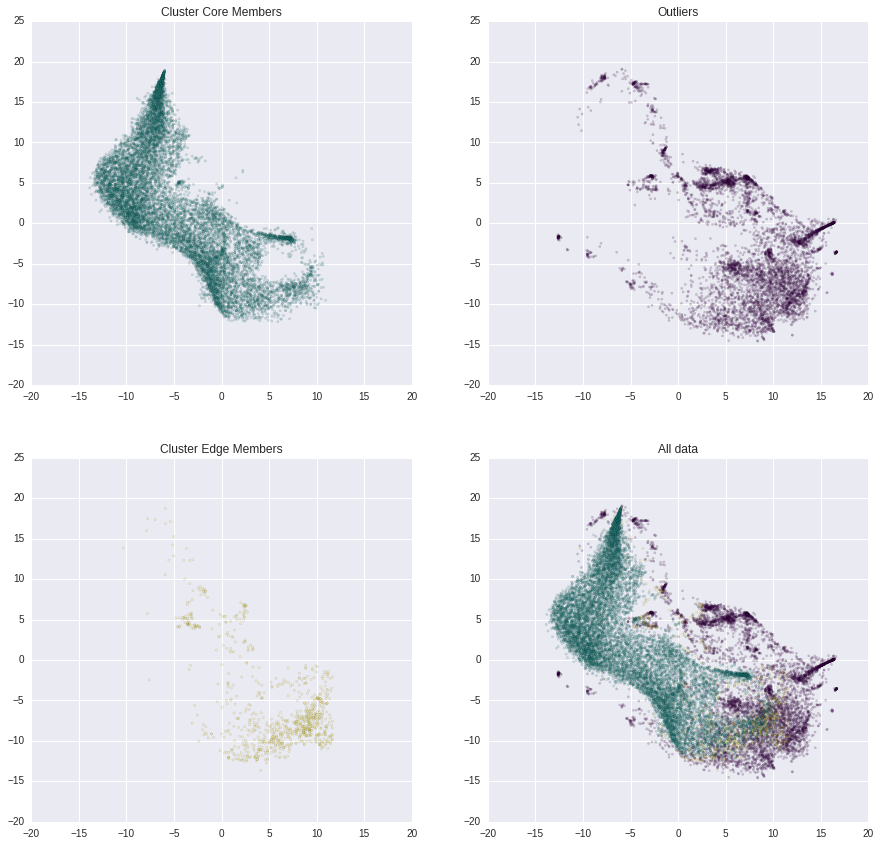

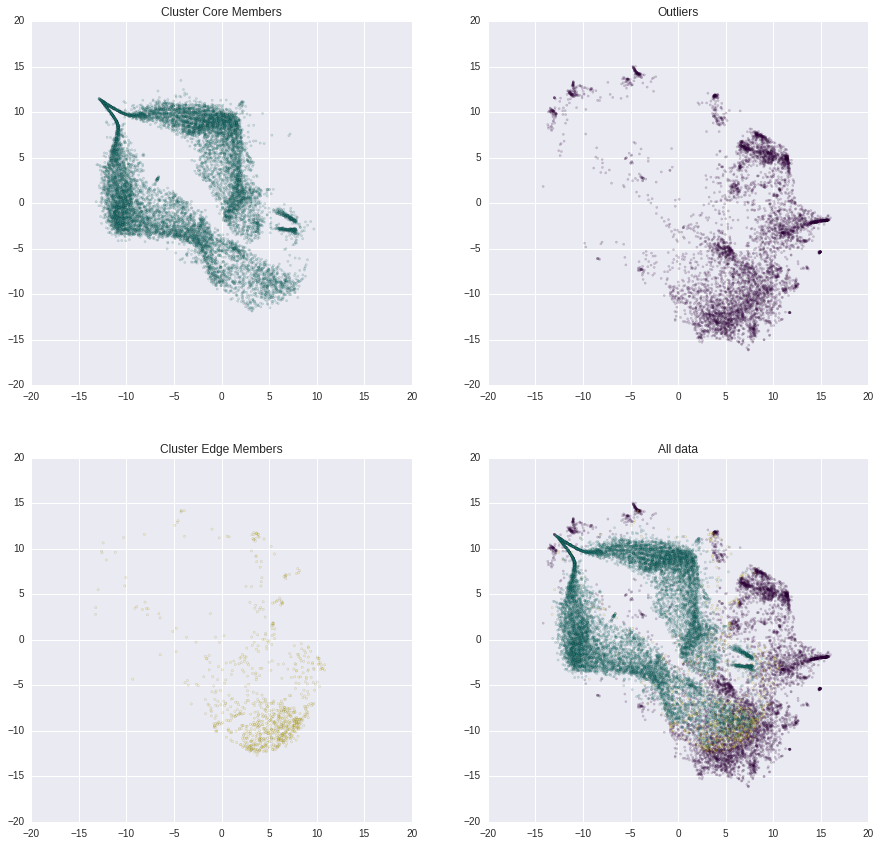

In [7]:
four_panel_tsne(Q4_sample.data)
four_panel_tsne(Q8_sample.data)
four_panel_tsne(Q11_sample.data)
four_panel_tsne(Q16_sample.data)

<IPython.core.display.Javascript object>


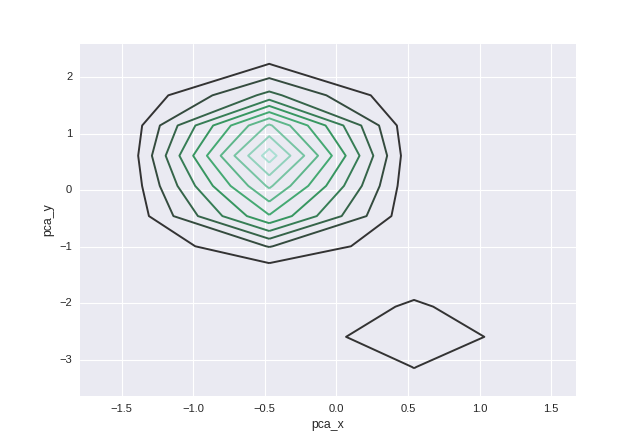

/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [3]:
%matplotlib notebook
sns.kdeplot(Q4.data[Q4.data.pca_x<100].pca_x,Q4.data[Q4.data.pca_x<100].pca_y,shade=False)

<IPython.core.display.Javascript object>


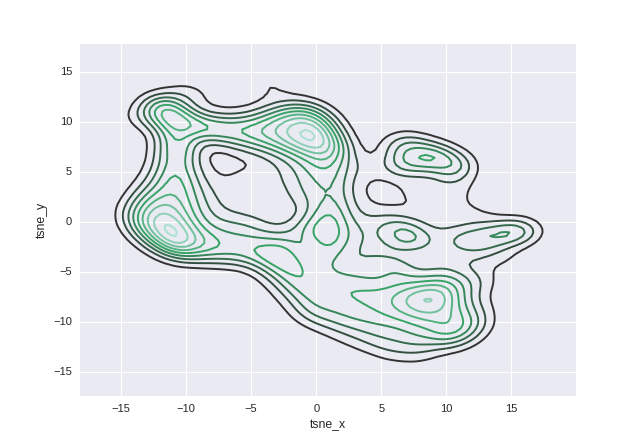

In [7]:

sns.kdeplot(Q4_sample.data[Q4_sample.data.tsne_x<40].tsne_x,
            Q4_sample.data[Q4_sample.data.tsne_x<40].tsne_y,
            shade=False)


<IPython.core.display.Javascript object>


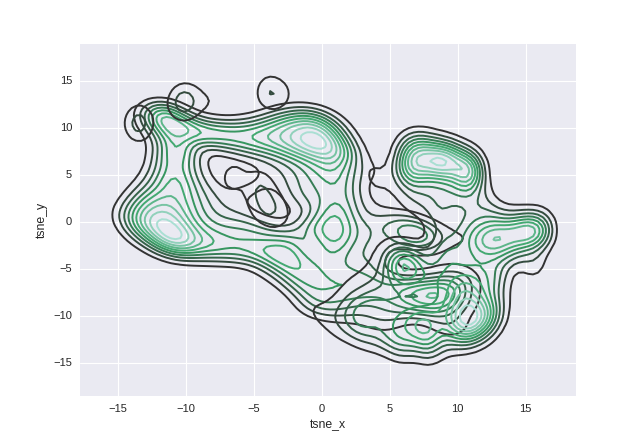

In [10]:
%matplotlib notebook
inliers = Q4_sample.data[Q4_sample.data.db_out>=0]
outliers = Q4_sample.data[Q4_sample.data.db_out==-1]
sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
            inliers[inliers.tsne_x<40].tsne_y,
            shade=False)
sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
            outliers[outliers.tsne_x<40].tsne_y,
            shade=False)


In [43]:

def four_panel_kde(data):
    sns.set_style('dark')
    labels = data.db_out
    outliers = data[labels==-1]
    inliers = data[labels!=-1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(421)

    ax1.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax1.set_title('All Data')

    ax2 = fig.add_subplot(422)
    sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                inliers[inliers.tsne_x<40].tsne_y,
                shade=True,ax=ax2,cmap='Greens',shade_lowest=False)
    ax2.set_title('Cluster Members')

    ax3 = fig.add_subplot(423)
    sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                shade=True,ax=ax3,cmap='Blues',shade_lowest=False)
    ax3.set_title('Outliers')
    
    ax4 = fig.add_subplot(424)

    sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                inliers[inliers.tsne_x<40].tsne_y,
                shade=True,ax=ax4,cmap='Greens',shade_lowest=False, label='Cluster Members')
    """
    sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                shade=True,ax=ax4,cmap='Blues',shade_lowest=False,alpha=.6)
    #"""
    
    ax4.scatter(outliers[outliers.tsne_x<40].tsne_x,
           outliers[outliers.tsne_x<40].tsne_y,
           c=colorVal[labels==-1][outliers.tsne_x<40],
           marker='.',alpha=.2,label='Outliers')
    ax4.legend()
    #"""


    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [ ]:
def four_panel_kde(data,
                   col_clus='Greens',shade_clus=True,
                   col_out='Blues',shade_out=True,
                   comb_plot='kde_scatter'):
    
    if shade_clus and col_clus=='Greens':
        col_clus='Greens_d'
    if shade_out and col_out=='Blues':
        col_out='Blues_d'
        
    sns.set_style('dark')
    labels = data.db_out
    outliers = data[labels==-1]
    inliers = data[labels!=-1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(421)

    ax1.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax1.set_title('All Data')

    ax2 = fig.add_subplot(422)
    sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                inliers[inliers.tsne_x<40].tsne_y,
                shade=shade_clus,ax=ax2,cmap=col_clus,shade_lowest=False)
    ax2.set_title('Cluster Members')

    ax3 = fig.add_subplot(423)
    sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                shade=shade_out,ax=ax3,cmap=col_out,shade_lowest=False)
    ax3.set_title('Outliers')
    
    ax4 = fig.add_subplot(424)
    if comb_plot=='kde_scatter':
        sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                    inliers[inliers.tsne_x<40].tsne_y,
                    shade=shade_clus,ax=ax4,cmap=col_clus,shade_lowest=False)
        """
        sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                    outliers[outliers.tsne_x<40].tsne_y,
                    shade=True,ax=ax4,cmap='Blues',shade_lowest=False,alpha=.6)
        #"""

        ax4.scatter(outliers[outliers.tsne_x<40].tsne_x,
               outliers[outliers.tsne_x<40].tsne_y,
               c=colorVal[labels==-1][outliers.tsne_x<40],
               marker='.',alpha=.2,label='Outliers')
        ax4.legend()
    elif comb_plot=='kde_kde':
        sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                    inliers[inliers.tsne_x<40].tsne_y,
                    shade=shade_clus,ax=ax4,cmap=col_clus,shade_lowest=False)


        sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                    outliers[outliers.tsne_x<40].tsne_y,
                    shade=shade_out,ax=ax4,cmap=col_out,shade_lowest=False,alpha=.6)
        ax4.legend()
        
    elif comb_plot=='kde':
        sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                    inliers[inliers.tsne_x<40].tsne_y,
                    shade=shade_clus,ax=ax4,cmap=col_clus,shade_lowest=False)
    elif comb_plot=='':
    #"""


    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

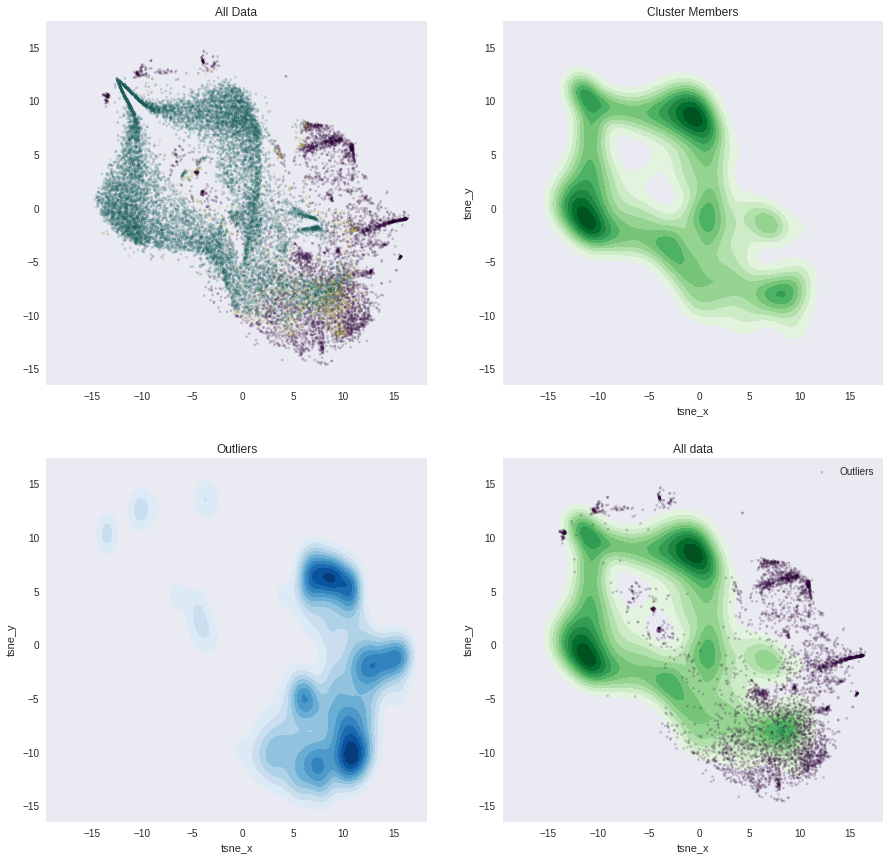

In [44]:
four_panel_kde(Q4_sample.data)

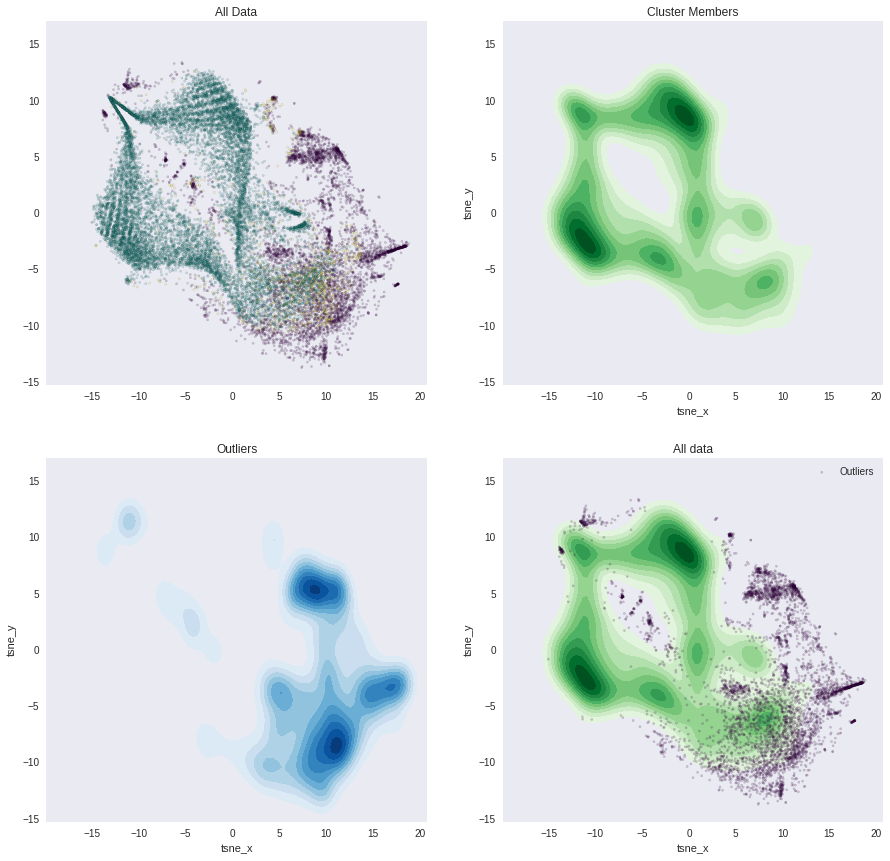

In [45]:
four_panel_kde(Q8_sample.data)

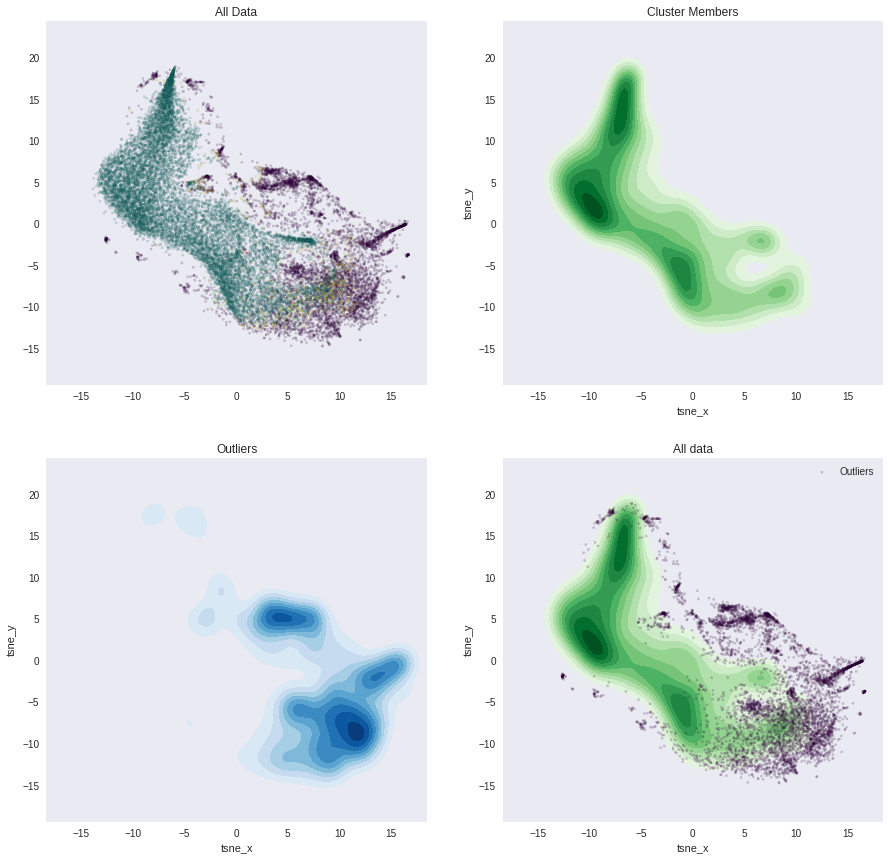

In [46]:
four_panel_kde(Q11_sample.data)

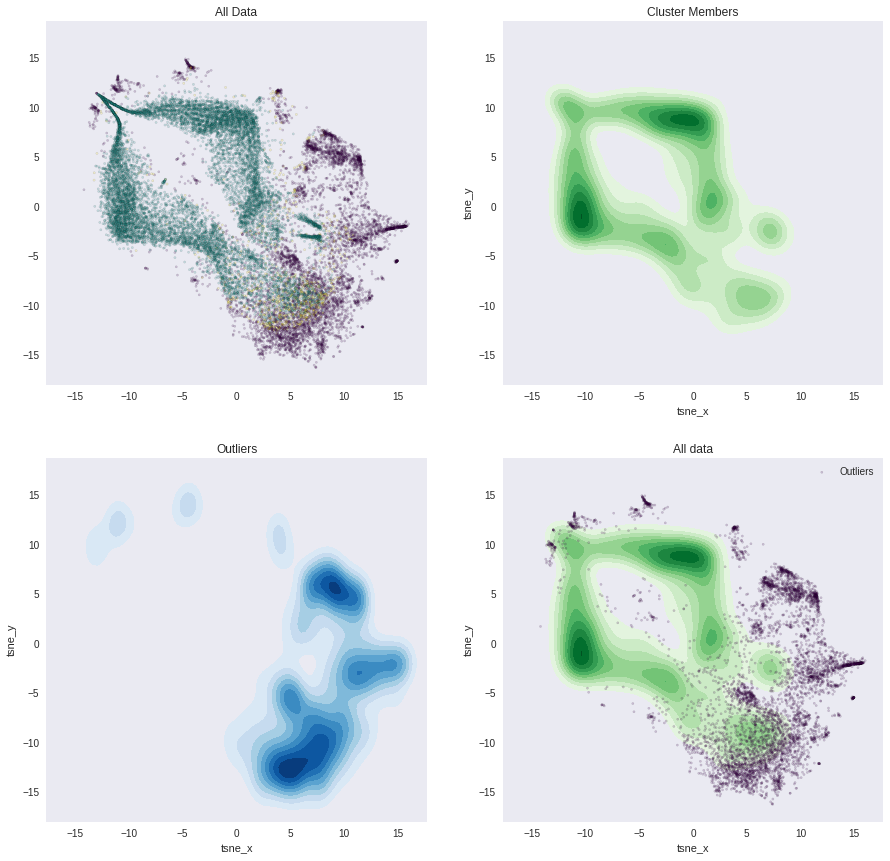

In [47]:
four_panel_kde(Q16_sample.data)

In [49]:
Q4_sample.data.columns

Index([u'absmeansecder', u'amp', u'autocorrcoef', u'coeffvar', u'diff_asymm',
       u'flatmean', u'flatrat', u'g_asymm', u'kurt', u'len_nmax', u'len_nmin',
       u'longtermtrend', u'mad', u'magratio', u'mautocorrcoef', u'maxslope',
       u'maxvars', u'maxvarsr', u'mbp', u'meanabsslope', u'meanmedrat',
       u'meannslope', u'meanpslope', u'mid20', u'mid35', u'mid50', u'mid65',
       u'mid80', u'minslope', u'naiveperiod', u'normamp', u'num_nsdspikes',
       u'num_nspikes', u'num_pm', u'num_psdspikes', u'num_pspikes',
       u'num_zcross', u'numnegoutliers', u'numout1s', u'numoutliers',
       u'numposoutliers', u'oeratio', u'percentamp', u'periodicity',
       u'periodicityr', u'pstrend', u'ptpslopes', u'rough_g_asymm',
       u'roundmean', u'roundrat', u'sautocorrcoef', u'skews', u'skewslope',
       u'stdratio', u'stds', u'tflatmean', u'troundmean', u'varabsslope',
       u'varslope', u'varss', u'db_out', u'pca_x', u'pca_y', u'db_cluster',
       u'tsne_x', u'tsne_y'],
      dtyp

In [66]:
for q in Q_dict:
    print(q,len(Q_dict[q].data[Q_dict[q].data.db_out==-1]))

('Q8', 5041)
('Q16', 5750)
('Q11', 5879)
('Q4', 4866)


In [81]:

for q in Q_dict:
    data = Q_dict[q].data
    Q_dict[q].data['KID']=[i[:13] for i in Q_dict[q].data.index]
    
# A numpy arrays containing all kID's for data ID'd as outliers
kid_out=dict()
for q in Q_dict:
    kid_out[q]=Q_dict[q].data.KID[Q_dict[q].data.db_out==-1]

# Outliers in any quarter, not necessarily in all quarters
out_all = np.unique(np.concatenate([kid_out[q] for q in kid_out]))

print("""
Number of lightcurves identified as an outlier in at least one quarter {:}
""".format(len(out_all)))
print("""
As a percent of total lightcurves ({:}/{:}) {:.2f}%
""".format(len(out_all),
           len(Q4.data),
           float(len(out_all))/float(len(Q4.data))*100.))


Number of lightcurves identified as an outlier in at least one quarter 8507


As a percent of total lightcurves (8507/149789) 5.68%



In [83]:
# Identify outliers that are exclusive to each quarter
exc = dict()
for q in kid_out:
    out = kid_out[q]
    for p in kid_out:
        if q!=p:
            out = np.setdiff1d(out,kid_out[p])
    exc[q]=out
    print("""
    Number of lightcurves identified outliers only in {:s}: {:d}
    As a percent of quarter outliers ({:d}/{:d}): {:.2f}%
    As a percent of total outliers ({:d}/{:d}): {:.2f}%
    """.format(q,len(exc[q]),
              len(exc[q]),len(kid_out[q]),float(len(exc[q]))/float(len(kid_out[q]))*100.,
              len(exc[q]),len(Q4.data),float(len(exc[q]))/float(len(Q4.data))*100.
              ))


    Number of lightcurves identified outliers only in Q8: 624
    As a percent of quarter outliers (624/5041): 12.38%
    As a percent of total outliers (624/149789): 0.42%
    

    Number of lightcurves identified outliers only in Q16: 1043
    As a percent of quarter outliers (1043/5750): 18.14%
    As a percent of total outliers (1043/149789): 0.70%
    

    Number of lightcurves identified outliers only in Q11: 1147
    As a percent of quarter outliers (1147/5879): 19.51%
    As a percent of total outliers (1147/149789): 0.77%
    

    Number of lightcurves identified outliers only in Q4: 560
    As a percent of quarter outliers (560/4866): 11.51%
    As a percent of total outliers (560/149789): 0.37%
    


In [98]:
# Identify outliers that are exclusive to each quarter
ubiquitous = dict()
for q in kid_out:
    out = kid_out[q]
    for p in kid_out:
        if q!=p:
            out = np.intersect1d(out,kid_out[p])
    ubiquitous[q]=out
    print("""
    Number of lightcurves identified outliers in all {:s}: {:d}
    As a percent of quarter outliers ({:d}/{:d}): {:.2f}%
    As a percent of total outliers ({:d}/{:d}): {:.2f}%
    """.format(q,len(ubiquitous[q]),
              len(ubiquitous[q]),len(kid_out[q]),float(len(ubiquitous[q]))/float(len(kid_out[q]))*100.,
              len(ubiquitous[q]),len(Q4.data),float(len(ubiquitous[q]))/float(len(Q4.data))*100.
              ))


    Number of lightcurves identified outliers in all Q8: 3584
    As a percent of quarter outliers (3584/5041): 71.10%
    As a percent of total outliers (3584/149789): 2.39%
    

    Number of lightcurves identified outliers in all Q16: 3584
    As a percent of quarter outliers (3584/5750): 62.33%
    As a percent of total outliers (3584/149789): 2.39%
    

    Number of lightcurves identified outliers in all Q11: 3584
    As a percent of quarter outliers (3584/5879): 60.96%
    As a percent of total outliers (3584/149789): 2.39%
    

    Number of lightcurves identified outliers in all Q4: 3584
    As a percent of quarter outliers (3584/4866): 73.65%
    As a percent of total outliers (3584/149789): 2.39%
    


In [93]:
kid_out['Q4'].index

Index([u'kplr000757099-2010078095331_llc.fits',
       u'kplr000892376-2010078095331_llc.fits',
       u'kplr000893507-2010078095331_llc.fits',
       u'kplr000893647-2010078095331_llc.fits',
       u'kplr001025986-2010078095331_llc.fits',
       u'kplr001026032-2010078095331_llc.fits',
       u'kplr001161345-2010078095331_llc.fits',
       u'kplr001293835-2010078095331_llc.fits',
       u'kplr001432214-2010078095331_llc.fits',
       u'kplr001434591-2010078095331_llc.fits',
       ...
       u'kplr012689656-2010078095331_llc.fits',
       u'kplr012690208-2010078095331_llc.fits',
       u'kplr012736658-2010078095331_llc.fits',
       u'kplr012785282-2010078095331_llc.fits',
       u'kplr012835232-2010078095331_llc.fits',
       u'kplr012984227-2010078095331_llc.fits',
       u'kplr100000950-2010078095331_llc.fits',
       u'kplr100000962-2010078095331_llc.fits',
       u'kplr100000963-2010078095331_llc.fits',
       u'kplr100000964-2010078095331_llc.fits'],
      dtype='object', length